<a href="https://colab.research.google.com/github/SaketMunda/certifications/blob/master/tensorflow_developer_cert_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Developer Certificate Exam Practice

This notebook covers the practice of topics mentioned in [TensorFlow Candidate Handbook](https://www.tensorflow.org/static/extras/cert/TF_Certificate_Candidate_Handbook.pdf) for the tensorflow developer certification.


## (1) Build and train neural network models using TensorFlow 2.x

You need to understand the foundational principles of machine learning (ML) and deep learning (DL) using TensorFlow 2.x. You need to know how to:

- [x]  Use TensorFlow 2.x.
- [x]  Build, compile and train machine learning (ML) models using TensorFlow.
- [x]  Preprocess data to get it read for use in a model.
- [x]  Use the models to predict results.
- [x]  Build sequential models with multiple layers.
- [x]  Build and train models for binary classification.
- [x]  Build and train models for multi-class classification.
- [x]  Plot loss and accuracy of a trained model.
- [x]  Identify strategies to prevent overfitting, including augmentation and dropout.
- [ ]  Use pretrained models (transfer learning).
- [ ]  Extract features from pre-trained models.
- [ ]  Ensure that inputs to a model are in the correct shape.
- [ ]  Ensure that you can match test data to the input shape of a neural network.
- [ ]  Ensure you can match output data of a neural network to specified input shape for test data.
- [x]  Understand batch loading of data.
- [x]  Use callbacks to trigger the end of training cycles.
- [x]  Use datasets from different sources.
- [ ]  Use datasets in different formats, including json and csv.
- [x]  Use datasets from tf.data.datasets.

### Use TensorFlow 2.x

In [ ]:
import tensorflow as tf

tf.__version__

'2.12.0'

### Build, compile and train machine learning (ML) models using TensorFlow.

For this we can create our own dataset using Scikit-Learn's datasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [ ]:
# make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=17)

X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# Check the values
X[:10], y[:10]

(array([[-0.69661282, -0.32845725],
        [ 0.95581012, -0.05841444],
        [ 0.53469756, -0.57338982],
        [-0.89332834,  0.42098993],
        [-0.65647965, -0.4353153 ],
        [ 0.61190346,  0.8002305 ],
        [-0.59835762, -0.56745289],
        [ 0.33167887,  0.92232011],
        [ 0.78275051, -0.13574349],
        [ 0.57968601,  0.84258556]]),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0]))

In [ ]:
# let's visualize the data
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})

circles.head()

,X0,X1,label
0,-0.696613,-0.328457,1
1,0.955810,-0.058414,0
2,0.534698,-0.573390,1
3,-0.893328,0.420990,0
4,-0.656480,-0.435315,1


In [ ]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

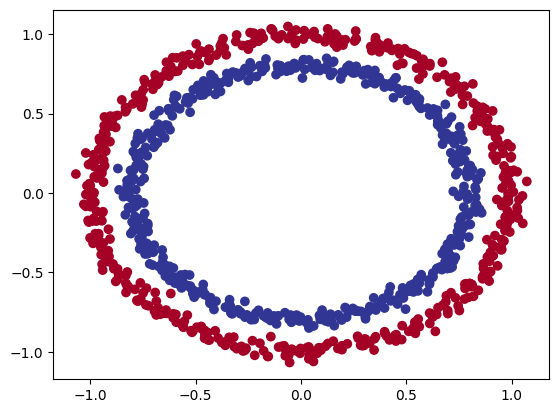

In [ ]:
# let's plot it
plt.scatter(circles["X0"], circles["X1"], c=y, cmap='RdYlBu');

From the plot we can observe that the problem we're going to solve is binary classification.

In [ ]:
# let's train the model but first need to split the train and test
from sklearn.model_selection import train_test_split

X = circles.drop(labels=['label'], axis=1)
y = circles['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, y_train.shape

((800, 2), (800,))

In [ ]:
# let's build a model
tf.random.set_seed(17)

# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile a model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# fit a model
model.fit(X_train,
          y_train,
          epochs=100,
          verbose=0,
          validation_data=(X_test, y_test))

In [ ]:
# evaluate the model
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.7109 - accuracy: 0.5200


[0.7109042406082153, 0.5199999809265137]

### Preprocess data to get it read for use in a model

Preprocessing means a series of functions to prepare your data for use with neural networks

### Use the models to predict results

We can take further the circle classification model and then make them predict, so let's build it once again.

In [ ]:
# set the random seed
tf.random.set_seed(17)

# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'), # 1 hidden layer with activation function relu
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # sigmoid for binary classification
])

# compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# fit the model
history = model.fit(X_train,
                    y_train,
                    epochs=200,
                    verbose=0,
                    validation_data=(X_test, y_test))

model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3627 - accuracy: 0.8550


[0.3626924157142639, 0.8550000190734863]

In [ ]:
# see the summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# use the model to predict
import numpy as np

y_preds = model.predict(X_test)

y_preds = tf.round(y_preds)

7/7 [==============================] - 0s 2ms/step


In [ ]:
y_preds[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]], dtype=float32)>

In [ ]:
y_test[:10]

641    1
833    0
113    1
123    1
341    1
449    1
441    1
763    1
390    0
394    1
Name: label, dtype: int64

In [ ]:
# get the confusion matrix evaluation
tf.math.confusion_matrix(y_test, tf.round(y_preds)).numpy()

array([[82, 22],
       [ 7, 89]], dtype=int32)

### Build and Train Multi-class classification Model

For this we are going to import [Fashion MNIST](https://www.tensorflow.org/datasets/catalog/fashion_mnist) multiclass classification dataset to build our model.

In [ ]:
# import the data
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# let's view the data and it's shape
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Here 28, 28 means the input is in 28 * 28 grayscale image

In [ ]:
train_data[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 118,  24,   0,
          0,   0,   0,   0,  48,  88,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 100, 212, 205, 185,
        179, 173, 186, 193, 221, 142,  85,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  85,  76, 199, 225,
        248, 255, 238, 226, 157,  68,  80,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  91,  69,  91, 201,
        218, 225, 209, 158,  61,  93,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  79,  89,  61,  59,
         87, 108,  75,  56,  76,  97,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  75,  89,  80,  80,
         67,  63,  73,  83,  80,  96,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

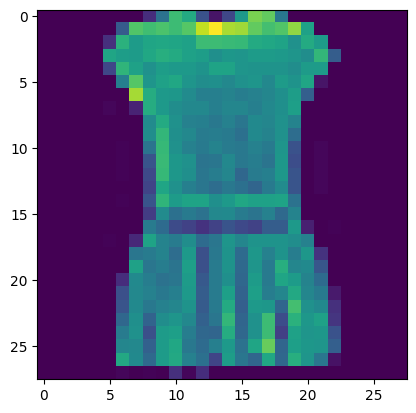

In [ ]:
# plot this
import matplotlib.pyplot as plt
plt.imshow(train_data[3]);

In [ ]:
train_labels[3]

3

Since these are some category or number, let's make this into human readable labels. Let's create a dataset for that as `class_names`

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [ ]:
class_names[train_labels[3]]

'Dress'

In [ ]:
train_data[2].shape

(28, 28)

So now in this way can read the output of our train labels and test labels. Next, let's build the model.

In [ ]:
# set the random seed
tf.random.set_seed(17)

# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# fit the model
history = model.fit(train_data,
                    train_labels,
                    epochs=10,
                    validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.4181 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 4)                 3140      
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


We can normalize the inputs since the range of numbers in the input is between 0-256, so if we normalize and shrink it between 0-1 and try building our model again.

In [ ]:
train_data[2].max(), train_data[2].min()

(255, 0)

In [ ]:
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / test_data.max()


train_data_norm.max(), train_data_norm.min()

(1.0, 0.0)

In [ ]:
train_data_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

now let's build the model again

In [ ]:
# random seed
tf.random.set_seed(17)

# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

# fit the model
history = model.fit(train_data_norm,
                    train_labels,
                    epochs=10,
                    validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 1.1401 - accuracy: 0.5590 - val_loss: 0.7910 - val_accuracy: 0.6917
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7120 - accuracy: 0.7329 - val_loss: 0.6766 - val_accuracy: 0.7676
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6115 - accuracy: 0.7856 - val_loss: 0.6245 - val_accuracy: 0.7851
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5704 - accuracy: 0.8019 - val_loss: 0.5895 - val_accuracy: 0.7945
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5520 - accuracy: 0.8086 - val_loss: 0.5910 - val_accuracy: 0.7974
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5415 - accuracy: 0.8118 - val_loss: 0.5954 - val_accuracy: 0.7948
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5335 - accuracy: 0.8156 - val_loss: 0.5692 - val_accuracy:

### Plot Loss and Accuracy curves

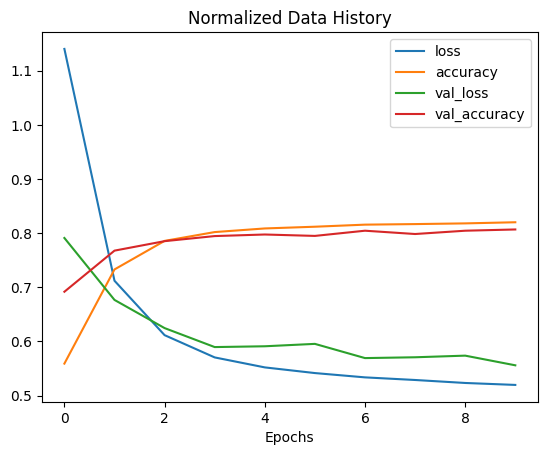

In [ ]:
pd.DataFrame(history.history).plot(title='Normalized Data History')
plt.xlabel("Epochs");

### Identify strategies to prevent overfitting, including augmentation and dropout

When we say, a model is **overfitting** it means that model is way good at learning the training dataset that when new data is sent for prediction it doesn't produces good results as compared to training dataset.

So there are some strategies which we can use to prevent overfitting like,
- Data augmentation during preprocessing the data or training the model.
- Also we can use dropout layers
- Add Regularization layers (such as MaxPool2D)
- Add more data..
- so on..




In [ ]:
# data augmentation
# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.RandomFlip("horizontal_and_vertical"),
#     tf.keras.layers.RandomRotation(0.2),
# ])

# let build the model again and use data_augmentation as the layer of the network
model = tf.keras.Sequential([
    #data_augmentation,
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# fit the model
history = model.fit(train_data_norm,
                    train_labels,
                    epochs=20,
                    validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3458 - accuracy: 0.5276 - val_loss: 0.9247 - val_accuracy: 0.6980
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7667 - accuracy: 0.7402 - val_loss: 0.6996 - val_accuracy: 0.7650
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6596 - accuracy: 0.7743 - val_loss: 0.6653 - val_accuracy: 0.7739
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6253 - accuracy: 0.7862 - val_loss: 0.6371 - val_accuracy: 0.7820
Epoch 5/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6095 - accuracy: 0.7893 - val_loss: 0.6316 - val_accuracy: 0.7833
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5983 - accuracy: 0.7937 - val_loss: 0.6294 - val_accuracy: 0.7821
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5905 - accuracy: 0.7969 - val_loss: 0.6345 - val_accuracy:

## (2) Image classification

You need to understand how to build image recognition and object detection models with deep neural
networks and convolutional neural networks using TensorFlow 2.x. You need to know how to:

- [x] Define Convolutional neural networks with Conv2D and pooling layers.
- [ ] Build and train models to process real-world image datasets.
- [ ] Understand how to use convolutions to improve your neural network.
- [ ] Use real-world images in different shapes and sizes..
- [ ] Use image augmentation to prevent overfitting.
- [ ] Use ImageDataGenerator.
- [ ] Understand how ImageDataGenerator labels images based on the directory structure

In [ ]:
# let's import some helper functions

# Get helper_functions.py script from Github
!wget https://raw.githubusercontent.com/SaketMunda/ml-helpers/master/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, unzip_data, walk_through_dir, plot_loss_curves

--2023-09-06 04:43:42--  https://raw.githubusercontent.com/SaketMunda/ml-helpers/master/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2904 (2.8K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   2.84K  --.-KB/s    in 0s      

2023-09-06 04:43:42 (52.1 MB/s) - ‘helper_functions.py’ saved [2904/2904]



In [ ]:
import zipfile

# Download the zipfile of 10 food classes images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-09-06 04:43:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.96.207, 108.177.126.207, 74.125.143.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.96.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  39.6MB/s    in 13s     

2023-09-06 04:43:58 (38.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

### Define Convolutional neural networks with Conv2D and pooling layers

CNN is a special kind of network which is used for computer vision (detecting patterns in visual data).

Convolutional neural network learn features and patterns by themselves, we don't need to tell them learn this or that feature.

**(typical)* Architecture of CNN:**

| Hyperparameter / Layer Type | What does it do ? | Typical Values |
|--|--|--|
|Input image (s)| Target images you'd like to discover patterns in | Whatever you can take a photo (or video) of |
|Input layer|Takes in target images and preprocess them for further layers| `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important feature from target images | Multiple, can create with tf.keras.ConvXD (X can be 1D, 2D, 3D based on the input) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU |
| Pooling layer | Reduces the dimensionality of learned image features | Average [tf.keras.layers.AvgPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D) or Max [tf.keras.layers.MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) |
| Fully connected layer | Further refines learned features from convolution layers | [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi) |
| Output Activation | Adds non-linearities to output layer | [tf.keras.activations.sigmoid](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid)(binary classification) or [tf.keras.activations.softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |




### Build and Train models to process real-world image datasets

We have images of Food, let's visualise them first and then proceed with building the model later.


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


#### Exploring the Food101 dataset from Tensorflow datasets

Let's find out a few details about our dataset,

- The shape of our input data (image tensors)
- The datatype of our input data
- what the labels of our input data look like (e.g one-hot encoded vs label-encoded)
- do the labels match up with the class names ?

In [ ]:
# create a function to view random image
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def view_random_image(target_dir, target_class):
  # setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # get the random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  #print(f"Image shape: {img.shape}") # Show the shape of the image
  #return img

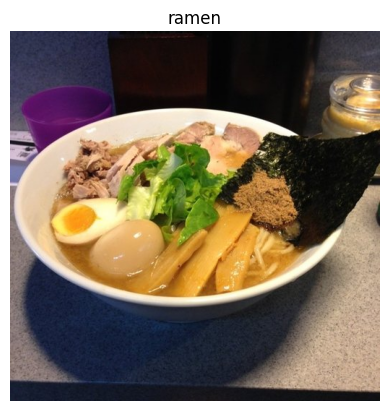

In [ ]:
view_random_image(target_dir = train_dir,
                  target_class = random.choice(class_names))

#### Preprocess the data

There are a couple of preprocessing steps we have to take before it's ready to model,
- convert it in `float32` datatype
- reduce the size to `(224, 224, 3)` and standardize the size
- normalize the tensor between 0 & 255

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Turning into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='categorical',
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


#### Create a model (start with baseline)

In [ ]:
# import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
# create a model
model = Sequential([
        Conv2D(10, 3, input_shape=(224, 224, 3)),
        Activation(activation='relu'),
        Conv2D(10, 3),
        Activation(activation='relu'),
        MaxPool2D(),
        Conv2D(10, 3, activation='relu'),
        Conv2D(10, 3, activation='relu'),
        MaxPool2D(),
        Flatten(),
        Dense(10, activation='softmax')
])

# compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=['accuracy'])

# fit the model
history = model.fit(train_data,
          epochs=5,
          steps_per_epoch=len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 44s 124ms/step - loss: 2.1623 - accuracy: 0.2068 - val_loss: 1.9829 - val_accuracy: 0.3008
Epoch 2/5
235/235 [==============================] - 28s 118ms/step - loss: 1.8779 - accuracy: 0.3449 - val_loss: 1.8479 - val_accuracy: 0.3724
Epoch 3/5
235/235 [==============================] - 32s 136ms/step - loss: 1.5108 - accuracy: 0.4933 - val_loss: 1.9243 - val_accuracy: 0.3480
Epoch 4/5
235/235 [==============================] - 28s 119ms/step - loss: 0.8625 - accuracy: 0.7281 - val_loss: 2.3898 - val_accuracy: 0.3156
Epoch 5/5
235/235 [==============================] - 32s 138ms/step - loss: 0.3058 - accuracy: 0.9068 - val_loss: 3.4629 - val_accuracy: 0.2980


Our model is actually overfitting, since it's learning the training data so well and it performing worse in test data. Let's see how the history graph looks like.

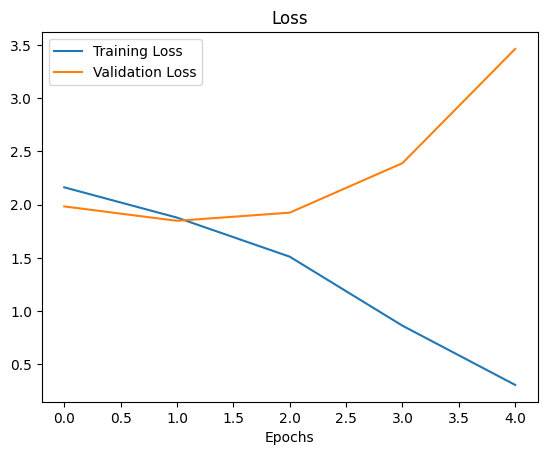

In [ ]:
# plot the loss curves
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')

plt.title('Loss')
plt.xlabel('Epochs')
plt.legend();



What are the things we can implement to prevent the overfitting ?

- Get more data : Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples
- Simlify model : reduce some layers if the architecture is too much complex
- Use data augmentation : Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data.
- Use transfer learning : to leverage the patterns (also called pretrained weights) one model has learned to use as the foundation for your tasks.

Preventing overfitting is also referred to as regularization.

#### Data Augmentation

To create augmented data, we'll create a new `ImageDataGenerator` instance, this time adding some parameters such as `rotation_range`, `zoom_range`, `horizontal_flip` etc to manipulate our images.

In [ ]:
# create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

# create the train data augmented
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
# visualize the data
images_augmented, labels_augmented = train_data_augmented.next()
len(images_augmented)

32

In [ ]:
# let's retrain the model

# clone the model
model_augmented = tf.keras.models.clone_model(model)

# compile the model
model_augmented.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                        optimizer=Adam(),
                        metrics=['accuracy'])

# fit the model
history_augmented = model_augmented.fit(train_data_augmented,
                                        epochs=5,
                                        steps_per_epoch=len(train_data_augmented),
                                        validation_data=test_data,
                                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 108s 453ms/step - loss: 2.2610 - accuracy: 0.1517 - val_loss: 2.1731 - val_accuracy: 0.2016
Epoch 2/5
235/235 [==============================] - 105s 447ms/step - loss: 2.1747 - accuracy: 0.2011 - val_loss: 2.0611 - val_accuracy: 0.2516
Epoch 3/5
235/235 [==============================] - 104s 444ms/step - loss: 2.0691 - accuracy: 0.2592 - val_loss: 1.8906 - val_accuracy: 0.3532
Epoch 4/5
235/235 [==============================] - 108s 461ms/step - loss: 2.0091 - accuracy: 0.2921 - val_loss: 1.9446 - val_accuracy: 0.3488
Epoch 5/5
235/235 [==============================] - 105s 446ms/step - loss: 1.9596 - accuracy: 0.3091 - val_loss: 1.8540 - val_accuracy: 0.3452


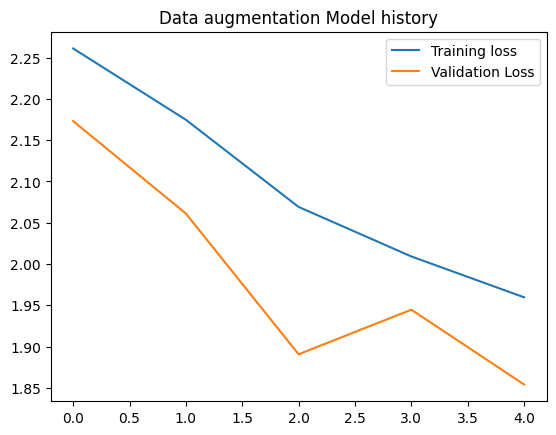

In [ ]:
# Plot the history curves
loss = history_augmented.history['loss']
val_loss = history_augmented.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')

plt.title('Data augmentation Model history')
plt.legend();

I think if we train this model for little longer epochs we can achieve reduce the loss more and also increase the accuracy. So let's create some callback function to store best model performed.

#### Modelling Callback function

1. **Tensorboard Callbacks** : Tensorboard is a tool to visualize different metric plots, training graph visualization, weight histograms, sampled profiling.
2. **Early Stopping** : Used to stop training when a monitored metric has stopped improving
3. **Model Checkpoint** : callback to save the model checkpoints as it's very helpful so that when we achieve that model produced the best result at a particular epoch when revert back to a previous state.
4. **ReducingLROnPlateau** : It monitors a specified metric and when the metric stops improving, it reduce the learning rate by a specified factor.

In [ ]:
import datetime

# tensorboard callbacks
log_dir = "image_classification" + "/" + "experiment_2" + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)

# early stopping, stop training if model's loss doesn't improve for 2 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=2,
                                                  verbose=1,
                                                  restore_best_weights=True)

# model checkpoint
checkpoint_path = "checkpoint_path/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor='val_loss',
                                                      save_best_only=True)

# ReducingLROnPlateau
reducingLR_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                             factor=0.2, # multiple the learning rate by 0.2 (reduce by 5x)
                                                             patience=2,
                                                             verbose=1,
                                                             min_lr=1e-7)

In [ ]:
# retrain it little longer
callback_model = tf.keras.models.clone_model(model)

callback_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                       optimizer='Adam',
                       metrics=['accuracy'])

history_callback = callback_model.fit(train_data_augmented,
                                      epochs=100,
                                      steps_per_epoch=len(train_data_augmented),
                                      validation_data = test_data,
                                      validation_steps = int(0.15 * len(test_data)),
                                      callbacks=[tensorboard_callback, early_stopping, model_checkpoint, reducingLR_on_plateau])

Epoch 1/100
235/235 [==============================] - ETA: 0s - loss: 2.2095 - accuracy: 0.1716

235/235 [==============================] - 105s 439ms/step - loss: 2.2095 - accuracy: 0.1716 - val_loss: 2.0622 - val_accuracy: 0.2358 - lr: 0.0010
Epoch 2/100
235/235 [==============================] - ETA: 0s - loss: 2.1093 - accuracy: 0.2315

235/235 [==============================] - 106s 448ms/step - loss: 2.1093 - accuracy: 0.2315 - val_loss: 1.9862 - val_accuracy: 0.2585 - lr: 0.0010
Epoch 3/100
235/235 [==============================] - ETA: 0s - loss: 2.0281 - accuracy: 0.2804

235/235 [==============================] - 101s 430ms/step - loss: 2.0281 - accuracy: 0.2804 - val_loss: 1.8757 - val_accuracy: 0.3324 - lr: 0.0010
Epoch 4/100
235/235 [==============================] - ETA: 0s - loss: 1.9730 - accuracy: 0.3105

235/235 [==============================] - 103s 440ms/step - loss: 1.9730 - accuracy: 0.3105 - val_loss: 1.8471 - val_accuracy: 0.3835 - lr: 0.0010
Epoch 5/100
235/235 [==============================] - 100s 425ms/step - loss: 1.9428 - accuracy: 0.3192 - val_loss: 1.8764 - val_accuracy: 0.3210 - lr: 0.0010
Epoch 6/100
235/235 [==============================] - ETA: 0s - loss: 1.9238 - accuracy: 0.3239

235/235 [==============================] - 102s 436ms/step - loss: 1.9238 - accuracy: 0.3239 - val_loss: 1.8274 - val_accuracy: 0.3892 - lr: 0.0010
Epoch 7/100
235/235 [==============================] - ETA: 0s - loss: 1.9041 - accuracy: 0.3417

235/235 [==============================] - 102s 434ms/step - loss: 1.9041 - accuracy: 0.3417 - val_loss: 1.8159 - val_accuracy: 0.4176 - lr: 0.0010
Epoch 8/100
235/235 [==============================] - 104s 443ms/step - loss: 1.8776 - accuracy: 0.3504 - val_loss: 1.8418 - val_accuracy: 0.3835 - lr: 0.0010
Epoch 9/100
235/235 [==============================] - ETA: 0s - loss: 1.8379 - accuracy: 0.3652

235/235 [==============================] - 136s 579ms/step - loss: 1.8379 - accuracy: 0.3652 - val_loss: 1.6836 - val_accuracy: 0.4545 - lr: 0.0010
Epoch 10/100
235/235 [==============================] - 105s 447ms/step - loss: 1.8325 - accuracy: 0.3683 - val_loss: 1.7330 - val_accuracy: 0.4006 - lr: 0.0010
Epoch 11/100
235/235 [==============================] - ETA: 0s - loss: 1.8068 - accuracy: 0.3841

235/235 [==============================] - 107s 456ms/step - loss: 1.8068 - accuracy: 0.3841 - val_loss: 1.6450 - val_accuracy: 0.4006 - lr: 0.0010
Epoch 12/100
235/235 [==============================] - ETA: 0s - loss: 1.8088 - accuracy: 0.3783

235/235 [==============================] - 105s 449ms/step - loss: 1.8088 - accuracy: 0.3783 - val_loss: 1.6009 - val_accuracy: 0.4688 - lr: 0.0010
Epoch 13/100
235/235 [==============================] - 103s 439ms/step - loss: 1.7709 - accuracy: 0.3891 - val_loss: 1.6804 - val_accuracy: 0.4205 - lr: 0.0010
Epoch 14/100
235/235 [==============================] - ETA: 0s - loss: 1.7557 - accuracy: 0.3997Restoring model weights from the end of the best epoch: 12.

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
235/235 [==============================] - 102s 434ms/step - loss: 1.7557 - accuracy: 0.3997 - val_loss: 1.6257 - val_accuracy: 0.4716 - lr: 0.0010
Epoch 14: early stopping


## (3) Natural language processing (NLP)

You need to understand how to use neural networks to solve natural language processing problems
using TensorFlow. You need to know how to:

- [ ] Build natural language processing systems using TensorFlow.
- [ ] Prepare text to use in TensorFlow models.
- [ ] Build models that identify the category of a piece of text using binary categorization
- [ ] Build models that identify the category of a piece of text using multi-class categorization
- [ ] Use word embeddings in your TensorFlow model.
- [ ] Use LSTMs in your model to classify text for either binary or multi-class categorization.
- [ ] Add RNN and GRU layers to your model.
- [ ] Use RNNS, LSTMs, GRUs and CNNs in models that work with text.
- [ ] Train LSTMs on existing text to generate text (such as songs and poetry)

NLP has the goal of deriving information out of natural language (could be sequences text or speech).
Another common term for NLP problems is sequence to sequence problems (seq2seq)

### Prepare text to use in TensorFlow model

In [1]:
# let's import some helper functions

# Get helper_functions.py script from Github
!wget https://raw.githubusercontent.com/SaketMunda/ml-helpers/master/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, unzip_data, walk_through_dir, plot_loss_curves

--2023-09-07 06:23:54--  https://raw.githubusercontent.com/SaketMunda/ml-helpers/master/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2904 (2.8K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   2.84K  --.-KB/s    in 0s      

2023-09-07 06:23:54 (51.0 MB/s) - ‘helper_functions.py’ saved [2904/2904]



#### Get a Text dataset

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# unzip the data
unzip_data('nlp_getting_started.zip')

--2023-09-07 06:23:59--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.207, 108.177.125.207, 142.250.157.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K   992KB/s    in 0.6s    

2023-09-07 06:24:00 (992 KB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



#### Visualize text data

In [3]:
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# check the shapes
train_df.shape, test_df.shape

((7613, 5), (3263, 4))

In [4]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


**About the data and problem,**

So main idea behind this problem is to identify which tweet is a Disaster and which isn't. So we have a column `text` as a tweet and `target` if 1 then disaster and 0 if not. This is a classification problem in NLP.

In [5]:
# shuffle the dataset so experiment further, it's a good practice
train_data_shuffled = train_df.sample(frac=1, random_state=17)
train_data_shuffled.head()

,id,keyword,location,text,target
7027,10072,typhoon,NaN,Typhoon Soudelor: When will it hit Taiwan ÛÒ ...,1
318,463,armageddon,NaN,RT @RTRRTcoach: #Love #TrueLove #romance lith ...,0
1681,2425,collide,www.youtube.com?Malkavius2,I liked a @YouTube video from @gassymexican ht...,0
5131,7318,nuclear%20reactor,"New York, New York",Japan's Restart of Nuclear Reactor Fleet Fast ...,1
2967,4262,drowning,"Hendersonville, NC",#ICYMI #Annoucement from Al Jackson... http://...,0


In [6]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
# how many examples of each class?
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [8]:
# let's visualize some random samples
import random

random_index = random.randint(0, len(train_data_shuffled) - 5)
for row in train_data_shuffled[['text','target']][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(disaster)" if target > 0 else "(not a disaster)")
  print(f"Text: {text}")
  print("--------\n")

Target: 0 (not a disaster)
Text: 6.Beyonce Is my pick for http://t.co/thoYhrHkfJ Fan Army #Beyhive http://t.co/WvJ39a3BGM
--------

Target: 0 (not a disaster)
Text: I'm hungry as a hostage
--------

Target: 1 (disaster)
Text: U.S National Park Services Tonto National Forest: Stop the Annihilation of the Salt River Wild Horse... http://t.co/KPQk0C4G0M via @Change
--------

Target: 1 (disaster)
Text: For those impacted by the #CalWildfires here are some great recovery tips to help you in the aftermath http://t.co/wwxbGuBww5
--------

Target: 1 (disaster)
Text: I WAS PEACEFULLY SITTING IN MY ROOM AND I HEARD THIS LOUD BANG OF SOMETHING FALLING
--------



#### Split the dataset into train and validation set

In [9]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_data_shuffled["text"].to_numpy(),
                                                                            train_data_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=17)

#### Converting text into numbers

Our labels are in numerical form (0 and 1) but our tweets are in string form.

But machine learning algorithm learns only through numbers so we have to convert those tweets/texts into numbers.

In NLP, there are two main concepts for turning text into numbers,

- Tokenization : word level tokenisation or character level tokenization or sub-word level tokenisation, just like one hot encoding
- Embeddings : richer representation of relationships between tokens, either create your own embedding or use pre-learned embedding.

##### Text Vectorization

Mapping words to numbers

In [10]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# using the default text vectorization variables
text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None,
                                    output_mode='int',
                                    output_sequence_length=None)

These are the default settings of TextVectorization, but let's customize it according to our own case.

In [11]:
# find the average number of tokens (words) in training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [13]:
# setup text vectorization with custom variables
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

To map our `TextVectorization` instance `text_vectorizer` to our data, we can the `adapt()` method on it whilst passing it our training set.

In [14]:
# fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [17]:
# try text vectorizer on a random tweet
random_tweet = random.choice(train_sentences)
print(f"Original text: \n{random_tweet}")
print(f"Vectorized text: \n")
text_vectorizer([random_tweet])

Original text: 
Private thirsty night?SAD BLOOD ROCK'N ROLL? #??
Vectorized text: 



<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[2770, 4431,    1,  316, 8990, 2294,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

we can also check the unique tokens in our vocabulary using the `get_vocabulary()` method

In [18]:
# get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]

print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 words : {top_5_words}")
print(f"Least 5 words : {bottom_5_words}")

Number of words in vocab: 10000
Top 5 words : ['', '[UNK]', 'the', 'a', 'in']
Least 5 words : ['ovo', 'overåÊhostages', 'overzero', 'overwatch', 'overturns']
